# AIDS dataset: Degeneration effect - repeated avatarization

In order to look at the effect of an avatarization, we repeat the avatarization on a avatar dataset `k = 20`.  

This notebook displays avatarization results of the AIDS dataset over iteration.  
To visualize the results, we displayed the FAMD projections in the original data space of avatars.

## Packages import 

In [1]:
# Main importation
import pandas as pd
import seaborn as sns
from matplotlib import patches, pyplot as plt
import numpy as np
from matplotlib.patches import Patch
import sys
from matplotlib.patches import Patch, Ellipse
import matplotlib.transforms as transforms

# Imputation function import 
from sklearn.impute import KNNImputer

# Local importation
sys.path.append("../..")
from lsg.dimension import Projection

##  Loading

In [2]:
df = pd.read_csv("../../datasets/AIDS/aids_original_data.csv", sep = ";")
df.drop(columns = "pidnum", inplace = True)

categorical_val = []
continous_val = []
for column in df.columns :
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

df[categorical_val] = df[categorical_val].astype("category")

In [3]:
df_all = pd.read_csv("../../datasets/messageD/aids.csv")
df_all[categorical_val] = df_all[categorical_val].astype("category")

In [4]:
# select specifics iterations

df_0 = df_all[df_all["iter"] == 0]  # original data
df_1 = df_all[df_all["iter"] == 1]
df_2 = df_all[df_all["iter"] == 2]
df_3 = df_all[df_all["iter"] == 3]
df_5 = df_all[df_all["iter"] == 5]
df_7 = df_all[df_all["iter"] == 7]
df_10 = df_all[df_all["iter"] == 10]

# Impute missing data in order to project the avatars in the multidimensionnal space.
df_0_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_0),
                        columns = df_0.columns.values)
df_1_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_1),
                        columns = df_0.columns.values)
df_2_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_2),
                        columns = df_0.columns.values)
df_3_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_3),
                        columns = df_0.columns.values)
df_5_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_5),
                        columns = df_0.columns.values)
df_7_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_7),
                        columns = df_0.columns.values)
df_10_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_10),
                         columns = df_0.columns.values)

## Multdimensionnal projection function: requiered dimension projection local function.

This section use projection function (such as FAMD) to projecte the avatar data in the original data space.

In [39]:
palette = sns.light_palette("#02297a", as_cmap=True)

def projection_plot(records_set, avatars_set, variable_visualization, iter, palette = palette, ax = None) :
    """
    Project the avatar dataset as supplemental individuals in the original daataset.
    Can color the individuals with a variable.
    input :
    - records_set : original dataset
    - avatars_set : avatar dataset
    - iter : the iteration number
    - palette : a color palette

    output:
    - ax1 : the projection of the avatar dataset.
    """
    
    # add a new fake indivudal in order to fox the plot scale during iteration
    new_ind = [48, 8009.8128, 0, 0, 0, 100, 0, 0, 1, 1500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    new_ind = pd.Series(new_ind, index = avatars_set.columns)
    avatars_set = avatars_set.append(new_ind, ignore_index = True)

    # perform projection
    pr = Projection()
    __, mod = pr.fit_transform(records_set, nf = 3)
    avat_coordinates = mod.transform(avatars_set)
    avat_coordinates["Dim. 1"] = - avat_coordinates["Dim. 1"]
    var1 = pr.model.explained_variance_ratio[0] * 100
    var2 = pr.model.explained_variance_ratio[1] * 100

    avat_coordinates["modality"] = avatars_set[variable_visualization]
    ax1 = ax or plt.gca()
    
    # general set up 
    paper_rc = {"lines.markersize": 11}
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale = 2, rc = paper_rc)
    with plt.style.context("seaborn-whitegrid"):
        plt.rcParams["axes.edgecolor"] = "0.15"
        plt.rcParams["axes.linewidth"] = 1.25
        plt.rcParams["font.family"] = "sans-serif"
        plt.rcParams["font.sans-serif"] = ["Helvetica"]


    # add scatterplot
    ax1.scatter(avat_coordinates["Dim. 1"], avat_coordinates["Dim. 2"],
                         edgecolors = "black", c = avat_coordinates["modality"], s = 75, cmap = palette)
    
    # setup x, y limits, labs and legend
    ax1.set_xlim(avat_coordinates["Dim. 1"].min() - 0.2, avat_coordinates["Dim. 1"].max() + 0.2)
    ax1.set_ylim(avat_coordinates["Dim. 2"].min() - 0.2, avat_coordinates["Dim. 2"].max() + 0.2)
    ax1.set_xlabel("Dim. 1 (" + str(round(var1)) + "%)")
    ax1.set_ylabel("Dim. 2 (" + str(round(var2)) + "%)")
    ax1.set(xlim = (-6, 6))
    ax1.set(ylim = (-6, 6))

    
    ax1.set_title("Iteration: {}".format(iter))
    return ax1

## Iterations vizualisation

Here we iterated the visualization over avatar generations.

Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction
Regarding variables types, a FAMD is performed for dimension reduction


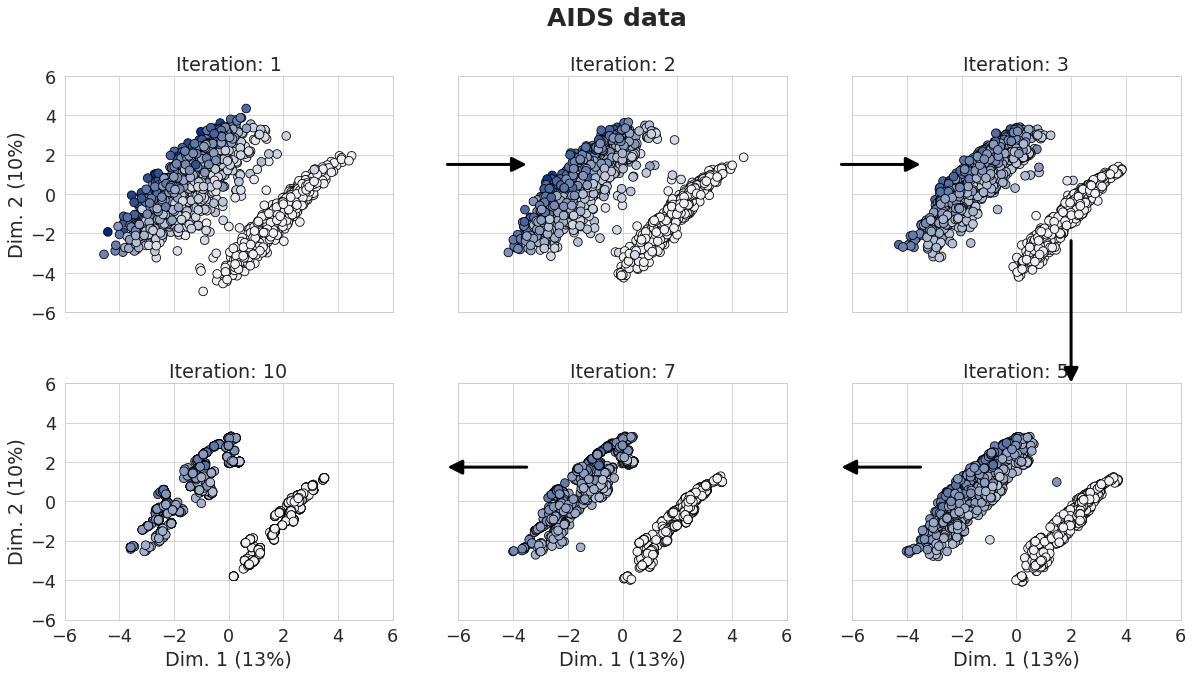

In [40]:

fig, axs = plt.subplots(2, 3, figsize = (20, 10))
paper_rc = {"lines.markersize": 11}
sns.set_style("whitegrid")
sns.set_context("paper", font_scale = 2, rc = paper_rc)
with plt.style.context("seaborn-whitegrid"):
        plt.rcParams["axes.edgecolor"] = "0.15"
        plt.rcParams["axes.linewidth"] = 1.25
        plt.rcParams["font.family"] = "sans-serif"
        plt.rcParams["font.sans-serif"] = ["Helvetica"]

list = [(df_1_imp, 1, axs[0, 0]),
        (df_2_imp, 2, axs[0, 1]),
        (df_3_imp, 3, axs[0, 2]),
        (df_5_imp, 5, axs[1, 2]),
        (df_7_imp, 7, axs[1, 1]),
        (df_10_imp, 10, axs[1, 0])]

for df_temp in list:
    projection_plot(df_0_imp, df_temp[0], "preanti", df_temp[1], ax = df_temp[2])


# Add arrow from one subplot to the other

axs_list = [ axs[0, 0],  axs[0, 1],  axs[0, 2],  axs[1, 2],  axs[1, 1],  axs[1, 0]]
xy_list = [([8, 1.7], [-3.5, 1.7]), ([8, 1.7], [-3.5, 1.7]), ([2, -2], [2, 5.5]), 
           ([-3.5, 1.4], [8, 1.4]), ([-3.5, 1.4], [8, 1.4])]


for i in range(len(axs_list)-1):
    xyA = xy_list[i][0]
    xyB = xy_list[i][1]
    
    axs_list[i].plot(*xyA)
    axs_list[i+1].plot(*xyB)

    transFigure = fig.transFigure.inverted()
    coord1 = transFigure.transform(axs_list[i].transData.transform(xyA))
    coord2 = transFigure.transform(axs_list[i+1].transData.transform(xyB))
    arrow = patches.FancyArrowPatch(
        coord1,  # posA
        coord2,  # posB
        shrinkA=0,  # so tail is exactly on posA (default shrink is 2)
        shrinkB=0,  # so head is exactly on posB (default shrink is 2)
        transform=fig.transFigure,
        color="black",
        arrowstyle="-|>",  # "normal" arrow
        mutation_scale=30,  # controls arrow head size
        linewidth=3,
    )
    fig.patches.append(arrow)

plt.subplots_adjust(hspace=0.3, wspace=0.2)
    
for ax in fig.get_axes():
    ax.label_outer()


plt.gcf().text(0.46, 0.95, "AIDS data", fontsize=25, weight = 'bold', family = "sans-serif")
    
# plt.savefig("../../figure/wbcd_MESSAGED/wbcd_iterations.svg", format = "svg")
plt.show()
